# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.658883e+01     1.260846e+01
 * time: 0.0013659000396728516
     1     3.447413e+01     8.555194e+00
 * time: 0.0038139820098876953
     2     2.493274e+01     2.811633e+00
 * time: 0.009747982025146484
     3     2.258929e+01     4.603619e+00
 * time: 0.014799833297729492
     4     2.031758e+01     2.457979e+00
 * time: 0.020066022872924805
     5     1.936627e+01     1.925900e+00
 * time: 0.025480985641479492
     6     1.863850e+01     1.504838e+00
 * time: 0.030614852905273438
     7     1.824271e+01     1.701207e+00
 * time: 0.034921884536743164
     8     1.789246e+01     1.514912e+00
 * time: 0.038977861404418945
     9     1.768640e+01     1.268969e+00
 * time: 0.04300498962402344
    10     1.747254e+01     1.062680e+00
 * time: 0.04697895050048828
    11     1.732446e+01     7.656916e-01
 * time: 0.050933837890625
    12     1.729564e+01     1.316661e+00
 * time: 0.05415606498718262
    13     1.724751e+01     8.240225e-01

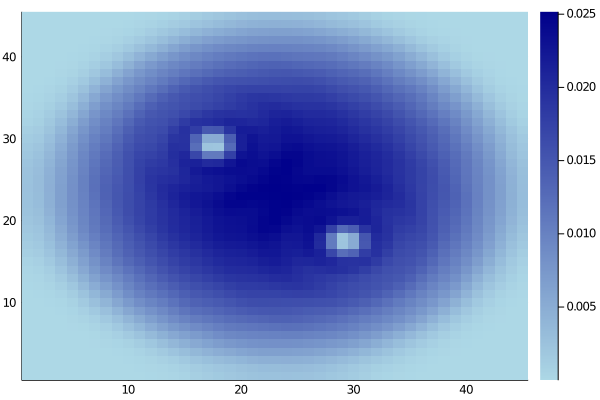

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)